In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

#drop one duplicate record with same city name, same ride_ids but different # of drivers
city_df = city_df.drop_duplicates("city", keep = "first")

# Combine the data into a single dataset
merged_df = city_df.merge(ride_df, on = "city")

# Display the data table for preview
merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

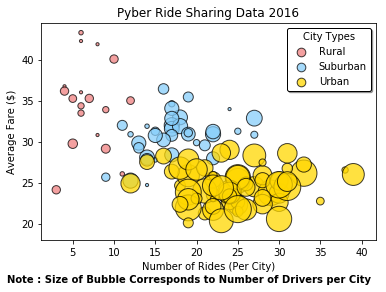

In [2]:
colors = {"Gold":"#FFD700", "Light Sky Blue":"#87CEFA", "Light Coral":"#F08080"}
#group be city name
by_city = merged_df.groupby("city")

#variable holding avgerage fare/city
avg_fare = by_city.mean()["fare"]

#variable holding rides/city
ride_count = by_city["ride_id"].count()

#number of drivers
driver_count = by_city.mean()["driver_count"]

#city type data
city_type = city_df.set_index("city")["type"]

#DF 
city_info = pd.DataFrame({"Number of Rides": ride_count, "Average Fare": avg_fare,
    "Number of Drivers": driver_count, "Type of City": city_type})
city_info.sort_values("Number of Drivers", ascending = False)

#separated dfs for city categories
rural = city_info[city_info["Type of City"] == "Rural"]
suburban = city_info[city_info["Type of City"] == "Suburban"]
urban = city_info[city_info["Type of City"] == "Urban"]

#Color Dictionary 
city_color = {"Urban": colors["Gold"], "Suburban": colors["Light Sky Blue"], "Rural": colors["Light Coral"]}

# scatter plots for each city type
plt.scatter(rural["Number of Rides"], rural["Average Fare"], s = rural["Number of Drivers"]*10, color = city_color["Rural"], edgecolor = "black", label = "Rural", alpha = .75)
plt.scatter(suburban["Number of Rides"], suburban["Average Fare"], s = suburban["Number of Drivers"]*10, color = city_color["Suburban"], edgecolor = "black", label = "Suburban", alpha = .75)
plt.scatter(urban["Number of Rides"], urban["Average Fare"], s = urban["Number of Drivers"]*10, color = city_color["Urban"], edgecolor = "black", label = "Urban", alpha = .75)

#print scatter plot with labels and titles
plt.figtext(.89, -.03, "Note : Size of Bubble Corresponds to Number of Drivers per City", ha="right", va="bottom", fontweight='bold')
plt.xlabel("Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data 2016")

lgnd = plt.legend(frameon = True, edgecolor = "black", shadow=True, title="City Types", fancybox=True)
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

#My plot
plt.show()

## Total Fares by City Type

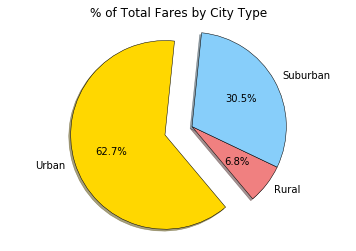

In [3]:
#group by type to be used by all pie charts
by_type = merged_df.groupby("type")["type", "fare", "ride_id", "driver_count"]

#total fare by city
fare_sum = by_type.sum()["fare"]

#pie chart build
labels = fare_sum.index

#colors and exploe the same for all pie charts, reference here
colors = [city_color[n] for n in labels]
explode = [0 , 0, .3]

plt.pie(fare_sum, startangle = 310, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#pie chart display
plt.title("% of Total Fares by City Type")
plt.axis("equal")

#My plot
plt.show()
#Side note: Pie plots look better when they resemble pacman

## Total Rides by City Type

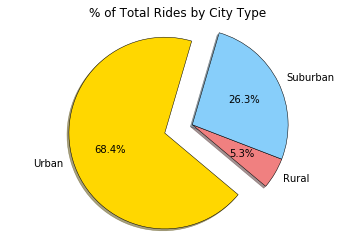

In [4]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure
ride_sum = by_type.count()["ride_id"]

labels = ride_sum.index
plt.pie(ride_sum, startangle = 320, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title("% of Total Rides by City Type")
plt.axis("equal")

#My plot
plt.show()

## Total Drivers by City Type

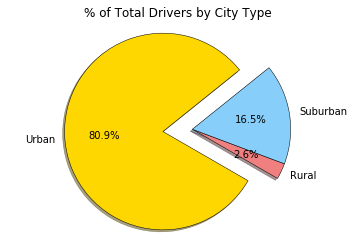

In [5]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure
driver_sum = city_df.groupby("type").sum()["driver_count"]

labels = driver_sum.index
plt.pie(driver_sum, startangle = 330, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {"linewidth": .5, "edgecolor": "black"})
plt.title("% of Total Drivers by City Type")
plt.axis("equal")

#My plot
plt.show()

In [6]:
#Observable trends based on the data:
#1. There appears to be a correlation between the number of rides and the average fare.
    #Some of the highest average fares are found in rural areas while urban areas trend toward the lowest fare averages
    #This might be caused by an increased average distance a person travels in rural areas. 
    #We would need more data to test this theory. 
#2. There is more competition for urban drivers when compared to suburban drivers. 
    #Urban drivers represent 80.9% of the total drivers but perform only 68.4% of the total rides and receive only 62.7% of the average fare.
    #It might be helpful to look at the percentage of drivers vs city population to gather more information and trends. 
#3. This data points to the fact that the market size in urban areas is significantly larger than that of rural and suburban areas. 
    #Despite the fact that there appears to be an already-saturated market in the urban area, urban fares total more than 
    #double that of suburban fares and nearly 10x that of rural fares. 
    #Considering the compensation model for ride-share companies like my startup (a percentage of the fare with no 
    #responsibility for vehicle maintenance, hourly wages, or large operating costs) I would suggest that the company 
    #invests mostly in urban areas, and focus on strategies to win business over their larger competitors, 
    #like price undercutting and incentive programs. 
